In [ ]:
!which python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import gpflow
from gpflow.ci_utils import ci_niter

np.random.seed(0)

In [ ]:
# Define some configuration constants.

num_data = 25
noise_std = 0.3
optimisation_steps = ci_niter(100)

In [ ]:
# Create dummy data.

X = np.random.randn(num_data, 1)  # [N, 2]
Y = np.sin(X) + 2 * np.cos(X) + np.random.randn(*X.shape) * noise_std  # [N, 1]
plt.plot(X, Y, "o")

In [ ]:
# Set up model and print

kernel = gpflow.kernels.SquaredExponential(lengthscales=[1.0, 2.0]) + gpflow.kernels.Linear()
model = gpflow.models.GPR((X, Y), kernel, noise_variance=noise_std ** 2)
model

In [ ]:
# We define a function that plots the model's prediction (in the form of samples) together with the data.
# Importantly, this function has no other argument than `fig: matplotlib.figure.Figure` and `ax: matplotlib.figure.Axes`.


def plot_prediction(fig, ax):
    Xnew = np.linspace(X.min() - 0.5, X.max() + 0.5, 100).reshape(-1, 1)
    Ypred = model.predict_f_samples(Xnew, full_cov=True, num_samples=1)
    ax.plot(Xnew.flatten(), np.squeeze(Ypred).T, "C2", linestyle='none', marker='x', alpha=0.2)
    ax.plot(X, Y, "o")


# Let's check if the function does the desired plotting
fig = plt.figure()
ax = fig.subplots()
plot_prediction(fig, ax)
plt.show()

In [ ]:
Xnew = np.linspace(X.min() - 0.5, X.max() + 0.5, 100).reshape(-1, 1)
Ypred = model.predict_f_samples(Xnew, full_cov=True, num_samples=100)

In [ ]:
Xnew.shape

In [ ]:
Ypred

In [ ]:
np.squeeze(Ypred).T.shape

In [ ]:
Ypred.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from gpflow.utilities import print_summary

# The lines below are specific to the notebook format
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

In [ ]:
X = np.random.randn(num_data, 1)  # [N, 2]
Y = np.sin(X) + 2 * np.cos(X) + np.random.randn(*X.shape) * noise_std  # [N, 1]

_ = plt.plot(X, Y, "kx", mew=2)

In [ ]:
k = gpflow.kernels.Matern52()

In [ ]:
print_summary(k)

In [ ]:
m = gpflow.models.GPR(data=(X, Y), kernel=k, mean_function=None)

In [ ]:
m.likelihood.variance.assign(0.01)
m.kernel.lengthscales.assign(0.3)

In [ ]:
opt = gpflow.optimizers.Scipy()

In [ ]:
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))
print_summary(m)

In [ ]:
X.shape, Y.shape

In [ ]:
## generate test points for prediction
xx = np.linspace(-2, 2, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m.predict_f(xx)

## generate 10 samples from posterior
tf.random.set_seed(1)  # for reproducibility
samples = m.predict_f_samples(xx, 10)  # shape (10, 100, 1)

## plot
plt.figure(figsize=(12, 6))
plt.plot(X, Y, "kx", mew=2)
plt.plot(xx, mean, "C2", linestyle='none', marker='x')
plt.fill_between(
    xx[:, 0],
    mean[:, 0] - 1.96 * np.sqrt(var[:, 0]),
    mean[:, 0] + 1.96 * np.sqrt(var[:, 0]),
    color="C3",
    alpha=0.2,
)

plt.plot(xx, samples[:, :, 0].numpy().T, "C0", linewidth=0.5)
_ = plt.xlim(-2, 2)

In [ ]:
mean

In [ ]:
xx

In [76]:
import pandas as pd
import numpy as np

In [99]:
metadata_pd = pd.read_csv("/Users/tallamjr/data/plasticc/training_set_metadata.csv", sep=',', index_col='object_id')
metadata_pd.index = metadata_pd.index.astype(str)
metadata_pd['obj_id'] = metadata_pd.index  # it is useful to be able to call this column by name

In [100]:
metadata_pd.head()

,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,obj_id
object_id,,,,,,,,,,,,
615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92,615
713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88,713
730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42,730
745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90,745
1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90,1124


In [109]:
df['object_id']=df['object_id'].astype(str)

/usr/local/anaconda3/envs/astronet/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
df_combi = df.merge(metadata_pd, on='object_id', how='left')
df_combi.head()

,object_id,mjd,filter,flux,flux_error,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,obj_id
0,730,60532.3019,lsstr,20.994711,1.047298,1,33.574219,-6.579593,170.455585,-61.548219,1,0.232,0.2262,0.0157,40.2561,0.021,42,730
1,730,60532.3173,lssti,31.523088,1.569497,1,33.574219,-6.579593,170.455585,-61.548219,1,0.232,0.2262,0.0157,40.2561,0.021,42,730
2,730,60532.3282,lsstz,41.159981,2.310168,1,33.574219,-6.579593,170.455585,-61.548219,1,0.232,0.2262,0.0157,40.2561,0.021,42,730
3,730,60532.3392,lssty,46.795868,5.458707,1,33.574219,-6.579593,170.455585,-61.548219,1,0.232,0.2262,0.0157,40.2561,0.021,42,730
4,730,60535.2957,lssti,30.361010,2.107024,1,33.574219,-6.579593,170.455585,-61.548219,1,0.232,0.2262,0.0157,40.2561,0.021,42,730


In [117]:
df_combi_trimmed = df_combi.drop(columns=["detected", "ra", "decl", "gal_l", "gal_b", "ddf", "hostgal_specz", "hostgal_photoz", "hostgal_photoz_err", "distmod", "mwebv", "obj_id"])
df_combi_trimmed.head()

,object_id,mjd,filter,flux,flux_error,target
0,730,60532.3019,lsstr,20.994711,1.047298,42
1,730,60532.3173,lssti,31.523088,1.569497,42
2,730,60532.3282,lsstz,41.159981,2.310168,42
3,730,60532.3392,lssty,46.795868,5.458707,42
4,730,60535.2957,lssti,30.361010,2.107024,42


In [118]:
df.head()

,object_id,mjd,filter,flux,flux_error,detected
924,730,60532.3019,lsstr,20.994711,1.047298,1
926,730,60532.3173,lssti,31.523088,1.569497,1
927,730,60532.3282,lsstz,41.159981,2.310168,1
928,730,60532.3392,lssty,46.795868,5.458707,1
931,730,60535.2957,lssti,30.361010,2.107024,1


In [146]:
object_list = list(np.unique(df['object_id']))

In [120]:
data = pd.read_csv("~/data/plasticc/training_set.csv", sep=',')
data.shape

(1421705, 6)

In [121]:
data = data.loc[data.detected == 1]  # Update dataframe with only detected points

In [122]:
data.shape

(236880, 6)

In [123]:
def remap_filters(df):  # maybe not in snmachine (raise issue/channel)
    """Function to remap integer filters to the corresponding lsst filters and
    also to set filter name syntax to what snmachine already recognizes

    df: pandas.dataframe
        Dataframe of lightcurve observations
    """
    df.rename({'passband': 'filter'}, axis='columns', inplace=True)
    filter_replace = {0: 'lsstu', 1: 'lsstg', 2: 'lsstr', 3: 'lssti',
                      4: 'lsstz', 5: 'lssty'}
    df['filter'].replace(to_replace=filter_replace, inplace=True)
    return df


In [124]:
data = remap_filters(df=data)
data.rename({'flux_err': 'flux_error'}, axis='columns', inplace=True)  # snmachine and PLAsTiCC uses a different denomination
data.head()

,object_id,mjd,filter,flux,flux_error,detected
0,615,59750.4229,lsstr,-544.810303,3.622952,1
1,615,59750.4306,lsstg,-816.434326,5.553370,1
2,615,59750.4383,lssti,-471.385529,3.801213,1
3,615,59750.4450,lsstz,-388.984985,11.395031,1
4,615,59752.4070,lsstr,-681.858887,4.041204,1


In [125]:
import re
# Abstract column names from dataset
for col in data.columns:
    if re.search('mjd', col):  # catches the column that has `mjd` in its name
        data.mjd_col = col
    if re.search('id', col):  # catches the column that has `id` in its name
        data.id_col = col

In [126]:
data.id_col

'object_id'

In [127]:
number_invalid_objs = 0  # Some objects may have empty data
number_objs = len(data[data.id_col].unique())
object_names = []

In [128]:
data

,object_id,mjd,filter,flux,flux_error,detected
0,615,59750.4229,lsstr,-544.810303,3.622952,1
1,615,59750.4306,lsstg,-816.434326,5.553370,1
2,615,59750.4383,lssti,-471.385529,3.801213,1
3,615,59750.4450,lsstz,-388.984985,11.395031,1
4,615,59752.4070,lsstr,-681.858887,4.041204,1
...,...,...,...,...,...,...
1421641,130779836,60133.3766,lssti,304.545258,28.338671,1
1421642,130779836,60137.1041,lssti,305.615570,28.171988,1
1421643,130779836,60138.1329,lssti,270.237976,28.013514,1
1421645,130779836,60142.1321,lssti,276.659332,27.884199,1


In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
data.head()

,object_id,mjd,filter,flux,flux_error,detected
0,615,59750.4229,lsstr,-544.810303,3.622952,1
1,615,59750.4306,lsstg,-816.434326,5.553370,1
2,615,59750.4383,lssti,-471.385529,3.801213,1
3,615,59750.4450,lsstz,-388.984985,11.395031,1
4,615,59752.4070,lsstr,-681.858887,4.041204,1


In [131]:
filters = data['filter']
filters = list(np.unique(filters))
filters

['lsstg', 'lssti', 'lsstr', 'lsstu', 'lssty', 'lsstz']

In [132]:
data

,object_id,mjd,filter,flux,flux_error,detected
0,615,59750.4229,lsstr,-544.810303,3.622952,1
1,615,59750.4306,lsstg,-816.434326,5.553370,1
2,615,59750.4383,lssti,-471.385529,3.801213,1
3,615,59750.4450,lsstz,-388.984985,11.395031,1
4,615,59752.4070,lsstr,-681.858887,4.041204,1
...,...,...,...,...,...,...
1421641,130779836,60133.3766,lssti,304.545258,28.338671,1
1421642,130779836,60137.1041,lssti,305.615570,28.171988,1
1421643,130779836,60138.1329,lssti,270.237976,28.013514,1
1421645,130779836,60142.1321,lssti,276.659332,27.884199,1


In [133]:
def filter_dataframe(object_list_filename, dataframe):

    plasticc_object_list = np.genfromtxt(object_list_filename, dtype='U')
    print(len(plasticc_object_list))
    print(dataframe.shape)
    filtered_dataframe = dataframe[dataframe['object_id'].isin(plasticc_object_list)]
    return filtered_dataframe

In [134]:
data.head()

,object_id,mjd,filter,flux,flux_error,detected
0,615,59750.4229,lsstr,-544.810303,3.622952,1
1,615,59750.4306,lsstg,-816.434326,5.553370,1
2,615,59750.4383,lssti,-471.385529,3.801213,1
3,615,59750.4450,lsstz,-388.984985,11.395031,1
4,615,59752.4070,lsstr,-681.858887,4.041204,1


In [135]:
df = filter_dataframe("../data/plasticc/train_subset.txt", data)
df.shape

3990
(236880, 6)


(74917, 6)

In [136]:
df.head()

,object_id,mjd,filter,flux,flux_error,detected
924,730,60532.3019,lsstr,20.994711,1.047298,1
926,730,60532.3173,lssti,31.523088,1.569497,1
927,730,60532.3282,lsstz,41.159981,2.310168,1
928,730,60532.3392,lssty,46.795868,5.458707,1
931,730,60535.2957,lssti,30.361010,2.107024,1


In [137]:
colours = {
    'lsstu': '#9a0eea', 
    'lsstg': '#75bbfd', 
    'lsstr': '#76ff7b',
    'lssti': '#fdde6c', 
    'lsstz': '#f97306', 
    'lssty': '#e50000'
}

In [138]:
print(colours['lsstu'])

#9a0eea


In [139]:
# Central passbands wavelengths
pb_wavelengths = {"lsstu": 3685., "lsstg": 4802., "lsstr": 6231.,
                  "lssti": 7542., "lsstz": 8690., "lssty": 9736.}


In [140]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [141]:
def plot_object(object_name, df, filters):
    for passband in filters:
        data = df[df['object_id'] == object_name]
        data = data[data['filter'] == passband]
        plt.errorbar(x=data['mjd'], y=data['flux'], yerr=data['flux_error'], 
                     linestyle='none', 
                     marker='o', 
                     color=colours[passband]
                    )

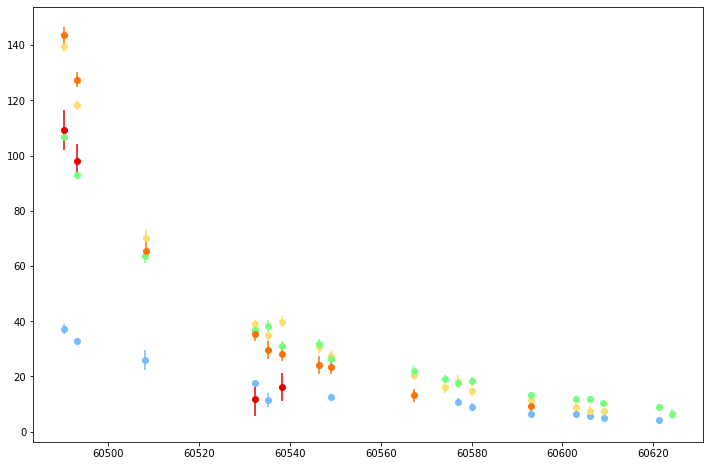

In [142]:
plot_object(1124, data, filters)

In [143]:
import george
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
import scipy.optimize as op
from functools import partial


def fit_2d_gp(obj_data, return_kernel=False, **kwargs):
    """Fit a 2D Gaussian process.

    If required, predict the GP at evenly spaced points along a light curve.

    Parameters
    ----------
    obj_data : pandas.core.frame.DataFrame or astropy.table.Table
        Time, flux and flux error of the data (specific filter of an object).
    return_kernel : Bool, default = False
        Whether to return the used kernel.
    kwargs : dict
        Additional keyword arguments that are ignored at the moment. We allow
        additional keyword arguments so that the various functions that
        call this one can be called with the same arguments.

    Returns
    -------
    kernel: george.gp.GP.kernel, optional
        The kernel used to fit the GP.
    gp_predict : functools.partial of george.gp.GP
        The GP instance that was used to fit the object.
    """
    guess_length_scale = 20.0  # a parameter of the Matern32Kernel

    #obj_data = preprocess_obs(obj_data, **kwargs)  # preprocess obs

    obj_times = obj_data.mjd
    obj_flux = obj_data.flux
    obj_flux_error = obj_data.flux_error
    obj_wavelengths = obj_data['filter'].map(pb_wavelengths)

    def neg_log_like(p):  # Objective function: negative log-likelihood
        gp.set_parameter_vector(p)
        loglike = gp.log_likelihood(obj_flux, quiet=True)
        return -loglike if np.isfinite(loglike) else 1e25

    def grad_neg_log_like(p):  # Gradient of the objective function.
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(obj_flux, quiet=True)

    # Use the highest signal-to-noise observation to estimate the scale. We
    # include an error floor so that in the case of very high
    # signal-to-noise observations we pick the maximum flux value.
    signal_to_noises = np.abs(obj_flux) / np.sqrt(
        obj_flux_error ** 2 + (1e-2 * np.max(obj_flux)) ** 2
    )
    scale = np.abs(obj_flux[signal_to_noises.idxmax()])

    kernel = (0.5 * scale) ** 2 * george.kernels.Matern32Kernel([
        guess_length_scale ** 2, 6000 ** 2], ndim=2)
    kernel.freeze_parameter("k2:metric:log_M_1_1")

    gp = george.GP(kernel)
    default_gp_param = gp.get_parameter_vector()
    x_data = np.vstack([obj_times, obj_wavelengths]).T
    gp.compute(x_data, obj_flux_error)

    bounds = [(0, np.log(1000 ** 2))]
    bounds = [(default_gp_param[0] - 10, default_gp_param[0] + 10)] + bounds
    results = op.minimize(neg_log_like, gp.get_parameter_vector(),
                          jac=grad_neg_log_like, method="L-BFGS-B",
                          bounds=bounds, tol=1e-6)

    if results.success:
        gp.set_parameter_vector(results.x)
    else:
        # Fit failed. Print out a warning, and use the initial guesses for fit
        # parameters.
        obj = obj_data['object_id'][0]
        print("GP fit failed for {}! Using guessed GP parameters.".format(obj))
        gp.set_parameter_vector(default_gp_param)

    gp_predict = partial(gp.predict, obj_flux)

    if return_kernel:
        return kernel, gp_predict
    else:
        return gp_predict


def predict_2d_gp(gp_predict, gp_times, gp_wavelengths):
    """Outputs the predictions of a Gaussian Process.

    Parameters
    ----------
    gp_predict : functools.partial of george.gp.GP
        The GP instance that was used to fit the object.
    gp_times : numpy.ndarray
        Times to evaluate the Gaussian Process at.
    gp_wavelengths : numpy.ndarray
        Wavelengths to evaluate the Gaussian Process at.

    Returns
    -------
    obj_gps : pandas.core.frame.DataFrame, optional
        Time, flux and flux error of the fitted Gaussian Process.
    """
    unique_wavelengths = np.unique(gp_wavelengths)
    number_gp = len(gp_times)
    obj_gps = []
    for wavelength in unique_wavelengths:
        gp_wavelengths = np.ones(number_gp) * wavelength
        pred_x_data = np.vstack([gp_times, gp_wavelengths]).T
        pb_pred, pb_pred_var = gp_predict(pred_x_data, return_var=True)
        # stack the GP results in a array momentarily
        obj_gp_pb_array = np.column_stack((gp_times, pb_pred, np.sqrt(pb_pred_var)))
        obj_gp_pb = Table(
            [
                obj_gp_pb_array[:, 0],
                obj_gp_pb_array[:, 1],
                obj_gp_pb_array[:, 2],
                [wavelength] * number_gp,
            ],
            names=["mjd", "flux", "flux_error", "filter"],
        )
        if len(obj_gps) == 0:  # initialize the table for 1st passband
            obj_gps = obj_gp_pb
        else:  # add more entries to the table
            obj_gps = vstack((obj_gps, obj_gp_pb))
            
    obj_gps = obj_gps.to_pandas()
    return obj_gps

In [167]:
data.columns

Index(['object_id', 'mjd', 'filter', 'flux', 'flux_error', 'detected'], dtype='object')

In [201]:
for object_id in object_list[:5]:
    print(object_id)

730
745
1124
1598
1632


In [273]:
adf = pd.DataFrame(data=[], columns=['mjd', 'lsstg', 'lssti', 'lsstr', 'lsstu', 'lssty', 'lsstz', 'object_id'])
for object_id in object_list[21:22]:
    df = data[data['object_id'] == object_id]
    gp_predict = fit_2d_gp(df)
    number_gp = 100
    gp_times = np.linspace(min(df['mjd']), max(df['mjd']), number_gp)
#     print(gp_times.shape)
    obj_gps = predict_2d_gp(gp_predict, gp_times, gp_wavelengths)
    obj_gps['filter'] = obj_gps['filter'].map(inverse_pb_wavelengths)
    
    obj_gps = obj_gps.pivot(index='mjd', columns='filter', values='flux')
    obj_gps = obj_gps.reset_index()
    obj_gps['object_id'] = object_id
    adf = np.vstack((adf, obj_gps))  
    
    
#obj_gps.head()
#adf.shape
pd.DataFrame(data=adf, columns=obj_gps.columns)
#pd.DataFrame(data=adf)

filter,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id
0,60611.1,6.0654,10.2218,3.78723,-47.0913,73.0167,45.7466,7033
1,60611.8,14.933,22.5206,16.248,-42.2312,90.6368,61.8009,7033
2,60612.4,25.2359,35.9137,30.6967,-36.6375,109.567,79.0795,7033
3,60613,37.4074,50.453,47.4069,-30.1991,129.766,97.5994,7033
4,60613.7,51.9577,66.1937,66.6812,-22.7963,151.197,117.371,7033
...,...,...,...,...,...,...,...,...
95,60671.5,522.723,1106.02,907.636,114.729,1052.36,1067.24,7033
96,60672.2,503.627,1080.49,885.884,110.559,1029.29,1048.17,7033
97,60672.8,485.071,1054.54,863.764,106.554,1006.94,1028.62,7033
98,60673.4,466.989,1028.31,841.324,99.9629,985.17,1008.63,7033


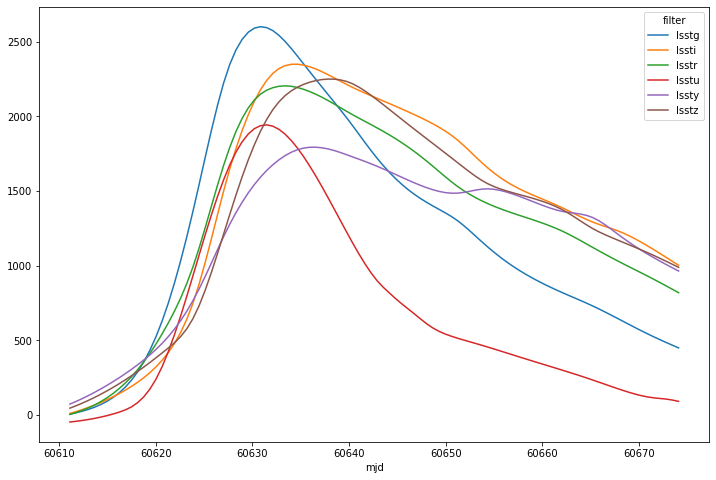

In [274]:
jj = pd.DataFrame(data=adf, columns=obj_gps.columns).drop(columns=['object_id'])
jj.set_index('mjd').plot();

In [258]:
obj_gps.reset_index()

filter,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id
0,60532.301900,13.920079,32.155142,21.046858,10.110353,44.070733,40.735444,730
1,60533.097594,13.857633,31.975777,20.929288,10.060757,43.892619,40.537964,730
2,60533.893288,13.794835,31.791269,20.811385,10.010689,43.709000,40.334172,730
3,60534.688982,13.731663,31.601240,20.693190,9.960139,43.519955,40.124121,730
4,60535.484676,13.668093,31.405309,20.574752,9.909095,43.325567,39.907867,730
...,...,...,...,...,...,...,...,...
95,60607.892824,3.083925,5.195206,3.529121,2.337295,16.778340,10.983845,730
96,60608.688518,2.928595,5.017554,3.309634,2.230361,16.519662,10.751077,730
97,60609.484212,2.773739,4.841027,3.090825,2.123512,16.263351,10.521220,730
98,60610.279906,2.619410,4.665649,2.873723,2.016775,16.009406,10.294221,730


In [216]:
full_df = pd.DataFrame(data=adf, columns=["mjd", "flux", "flux_error", "filter", "object_id"])
full_df['object_id'] = full_df['object_id'].astype(int)

In [217]:
len(np.unique(full_df['object_id']))

3990

In [218]:
full_df

,mjd,flux,flux_error,filter,object_id
0,60532.3,10.1104,10.8836,3685,730
1,60533.1,10.0608,10.8636,3685,730
2,60533.9,10.0107,10.8443,3685,730
3,60534.7,9.96014,10.8255,3685,730
4,60535.5,9.90909,10.8072,3685,730
...,...,...,...,...,...
2393995,60085.5,121.816,145.967,9736,130755807
2393996,60085.9,119.865,147.608,9736,130755807
2393997,60086.2,117.902,149.228,9736,130755807
2393998,60086.6,115.929,150.829,9736,130755807


In [221]:
full_df['filter'] = full_df['filter'].map(inverse_pb_wavelengths)
full_df

,mjd,flux,flux_error,filter,object_id
0,60532.3,10.1104,10.8836,lsstu,730
1,60533.1,10.0608,10.8636,lsstu,730
2,60533.9,10.0107,10.8443,lsstu,730
3,60534.7,9.96014,10.8255,lsstu,730
4,60535.5,9.90909,10.8072,lsstu,730
...,...,...,...,...,...
2393995,60085.5,121.816,145.967,lssty,130755807
2393996,60085.9,119.865,147.608,lssty,130755807
2393997,60086.2,117.902,149.228,lssty,130755807
2393998,60086.6,115.929,150.829,lssty,130755807


In [227]:
piv = full_df.pivot(index='mjd', columns='filter', values='flux')
piv.head()

ValueError: Index contains duplicate entries, cannot reshape

In [151]:
df = data[data['object_id'] == 745]

In [152]:
df.head()

,object_id,mjd,filter,flux,flux_error,detected
1157,745,60125.4094,lsstr,220.795212,1.492162,1
1158,745,60125.4171,lsstg,192.244293,1.432564,1
1159,745,60125.4248,lssti,203.250702,1.862000,1
1160,745,60125.4357,lsstz,183.633118,2.818825,1
1161,745,60125.4448,lssty,141.513290,11.663839,1


In [153]:
gp_predict = fit_2d_gp(df)

In [154]:
number_gp = 100

In [155]:
gp_times = np.linspace(min(df['mjd']), max(df['mjd']), number_gp)
gp_times.shape

(100,)

In [156]:
gp_wavelengths = np.vectorize(pb_wavelengths.get)(filters)
gp_wavelengths.shape

(6,)

In [157]:
obj_gps = predict_2d_gp(gp_predict, gp_times, gp_wavelengths)

In [158]:
type(obj_gps)

pandas.core.frame.DataFrame

In [219]:
inverse_pb_wavelengths = {v: k for k, v in pb_wavelengths.items()}

In [220]:
obj_gps['filter'] = obj_gps['filter'].map(inverse_pb_wavelengths)
obj_gps.head()

,mjd,flux,flux_error,filter,object_id
0,60049.981500,270.651425,22.411688,lsstu,130755807
1,60050.355402,271.083707,20.605983,lsstu,130755807
2,60050.729304,271.459584,19.453395,lsstu,130755807
3,60051.103206,271.777628,19.097608,lsstu,130755807
4,60051.477108,272.036594,19.588107,lsstu,130755807


In [161]:
# Central passbands wavelengths
pb_wavelengths = {"lsstu": 3685., "lsstg": 4802., "lsstr": 6231.,
                  "lssti": 7542., "lsstz": 8690., "lssty": 9736.}


In [162]:
pb_colors = {'lsstu':'#984ea3', 'lsstg':'#4daf4a', 'lsstr':'#e41a1c', 
             'lssti':'#377eb8', 'lsstz':'#ff7f00', 'lssty':'#e3c530'} # colours for the plot

def plot_real_data_and_model(obj_data, obj_model=None, number_col=2, 
                             show_title=False, show_legend=True):
    """Plots real data and model fluxes at the corresponding mjd"""
    passbands = np.unique(obj_data['filter'])
    passbands = ['lsstu', 'lsstg', 'lsstr', 'lssti', 'lsstz', 'lssty']
    for pb in passbands:
        obj_data_pb = obj_data[obj_data['filter'] == pb] # obj LC in that passband
        if obj_model is not None:
            obj_model_pb = obj_model[obj_model['filter'] == pb]
            model_flux = obj_model_pb['flux']
            plt.plot(obj_model_pb['mjd'], model_flux, color=pb_colors[pb], alpha=.7, label='')
            try:
                model_flux_error = obj_model_pb['flux_error']
                plt.fill_between(x=obj_model_pb['mjd'], y1=model_flux-model_flux_error, 
                                 y2=model_flux+model_flux_error, color=pb_colors[pb], alpha=.15, label=None)
            except:
                pass
        plt.errorbar(obj_data_pb['mjd'], obj_data_pb['flux'], obj_data_pb['flux_error'], 
                     fmt='o', color=pb_colors[pb], label=pb[-1])
    plt.xlabel('Time (days)')
    plt.ylabel('Flux units')
    if show_title:
        plt.title('Object ID: {}\nPhoto-z = {:.3f}'.format(obj_data.meta['name'], obj_data.meta['z']))
    if show_legend:
        plt.legend(ncol=number_col, handletextpad=.3, borderaxespad=.3, 
                   labelspacing=.2, borderpad=.3, columnspacing=.4)

In [163]:
obj_gps.head()

,mjd,flux,flux_error,filter
0,60125.409400,85.239398,13.169184,lsstu
1,60126.658766,78.827047,12.062357,lsstu
2,60127.908131,72.413508,10.973103,lsstu
3,60129.157497,66.042017,9.900084,lsstu
4,60130.406863,59.760191,8.842291,lsstu


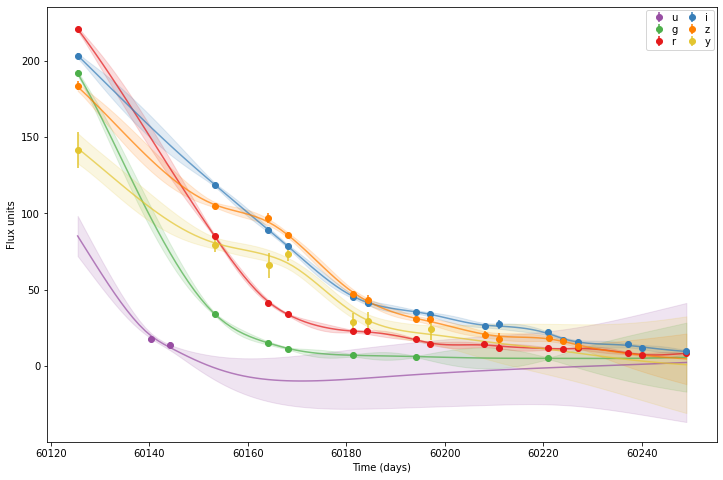

In [164]:
plot_real_data_and_model(df, obj_model=obj_gps)

In [165]:
obj_gps.head()

,mjd,flux,flux_error,filter
0,60125.409400,85.239398,13.169184,lsstu
1,60126.658766,78.827047,12.062357,lsstu
2,60127.908131,72.413508,10.973103,lsstu
3,60129.157497,66.042017,9.900084,lsstu
4,60130.406863,59.760191,8.842291,lsstu


In [166]:
piv = obj_gps.pivot(index='mjd', columns='filter', values='flux')
piv['obj_id'] = 745
piv.head()

filter,lsstg,lssti,lsstr,lsstu,lssty,lsstz,obj_id
mjd,,,,,,,
60125.409400,191.804452,203.486435,220.839308,85.239398,142.699996,183.006312,745
60126.658766,184.756912,199.536666,215.394826,78.827047,139.428623,179.251691,745
60127.908131,177.327218,195.580718,209.812026,72.413508,136.113325,175.363131,745
60129.157497,169.588797,191.617705,204.099033,66.042017,132.763736,171.368904,745
60130.406863,161.611846,187.648345,198.265394,59.760191,129.390911,167.296101,745


In [ ]:
import numpy as np
import tensorflow as tf
import gpflow
from gpflow.ci_utils import ci_niter
from gpflow.optimizers import NaturalGradient
from gpflow import set_trainable
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
object_name = 745

df = data[data['object_id'] == object_name]
df = df[df['filter'] == 'lsstr']
df['flux'].shape, df['flux_error'].shape

In [ ]:
y = df['flux']
y_err = df['flux_error']
y.shape, y_err.shape

In [ ]:
pp = np.column_stack([y, y_err])
pp.shape

In [ ]:
y = y.values.reshape(-1, 1)
y_err = y_err.values.reshape(-1, 1)
y.shape, y_err.shape

In [ ]:
Y_data = np.hstack([y, y_err])
Y_data.shape

In [ ]:
mjd = df['mjd']
obj_wavelengths = df['filter'].map(pb_wavelengths)
obj_wavelengths

In [ ]:
obj_wavelengths = obj_wavelengths.values.reshape(-1, 1)
mjd = mjd.values.reshape(-1, 1)

In [ ]:
mjd.shape

In [ ]:
X = np.hstack([mjd, obj_wavelengths])
X.shape

In [ ]:
X

In [ ]:
class HeteroskedasticGaussian(gpflow.likelihoods.Likelihood):
    def __init__(self, **kwargs):
        # this likelihood expects a single latent function F, and two columns in the data matrix Y:
        super().__init__(latent_dim=1, observation_dim=2, **kwargs)

    def _log_prob(self, H, Y):
        # log_prob is used by the quadrature fallback of variational_expectations and predict_log_density.
        # Because variational_expectations is implemented analytically below, this is not actually needed,
        # but is included for pedagogical purposes.
        # Note that currently relying on the quadrature would fail due to https://github.com/GPflow/GPflow/issues/966
        Y, NoiseVar = Y[:, 0], Y[:, 1]
        return gpflow.logdensities.gaussian(Y, H, NoiseVar)

    def _variational_expectations(self, Fmu, Fvar, Y):
        Y, NoiseVar = Y[:, 0], Y[:, 1]
        Fmu, Fvar = Fmu[:, 0], Fvar[:, 0]
        return (
            -0.5 * np.log(2 * np.pi)
            - 0.5 * tf.math.log(NoiseVar)
            - 0.5 * (tf.math.square(Y - Fmu) + Fvar) / NoiseVar
        )

    # The following two methods are abstract in the base class.
    # They need to be implemented even if not used.

    def _predict_log_density(self, Fmu, Fvar, Y):
        raise NotImplementedError

    def _predict_mean_and_var(self, Fmu, Fvar):
        raise NotImplementedError

In [ ]:
Y_data.shape, X.shape

In [ ]:
np.isnan(np.sum(Y_data)), np.isnan(np.sum(X))

In [ ]:
# model construction
likelihood = HeteroskedasticGaussian()
# kernel = gpflow.kernels.Matern52(lengthscales=0.5)
kernel = gpflow.kernels.Matern52(active_dims=[0], lengthscales=2) + gpflow.kernels.Matern52(active_dims=[1], lengthscales=2)
    
m = gpflow.models.VGP((X, Y_data), kernel=kernel, likelihood=likelihood, num_latent_gps=1)

In [ ]:
m

In [ ]:
set_trainable(m.q_mu, False)
set_trainable(m.q_sqrt, False)

In [ ]:
opt = gpflow.optimizers.Scipy()

In [ ]:
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))

In [ ]:
from gpflow.utilities import print_summary
# You can change the default format as follows:
gpflow.config.set_default_summary_fmt("notebook")
print_summary(m)

In [ ]:
# natgrad = NaturalGradient(gamma=1.0)
# adam = tf.optimizers.Adam()

In [ ]:
# for _ in range(ci_niter(1000)):
#     natgrad.minimize(model.training_loss, [(model.q_mu, model.q_sqrt)])
#     adam.minimize(model.training_loss, model.trainable_variables)

In [ ]:
m = gpflow.models.VGP(
    (X, Y_data), kernel=kernel, likelihood=likelihood, num_latent_gps=1
)

opt = gpflow.optimizers.Scipy()
opt.minimize(
    m.training_loss, variables=m.trainable_variables, options=dict(maxiter=25), method="L-BFGS-B"
)
# in practice, the optimization needs around 250 iterations to converge

In [ ]:
x_grid = np.linspace(-3, 3, 40)
xx, yy = np.meshgrid(x_grid, x_grid)
Xplot = np.vstack((xx.flatten(), yy.flatten())).T

In [ ]:
p, _ = m.predict_y(Xplot)

In [ ]:
y_err.shape, X.shape, y.shape

In [ ]:
X[0].min().round(), X[0].max().round()

In [ ]:
X[:, 0]

In [ ]:
del mu, var

In [ ]:
#let's do some plotting!
xx = np.linspace(X[:, 0].min().round(), X[:, 0].max().round(), 200)[:, None]

In [ ]:
obj_wavelengths[0]

In [ ]:
data_tensor = tf.ragged.constant(xx)
data_tensor.to_tensor()

In [ ]:
w = [6231.] * 200
W = np.array(w)
W = W.reshape(W.shape[0], 1)

In [ ]:
mu, var = m.predict_f([data_tensor.to_tensor(), W])

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xx, mu, "C0")
plt.plot(xx, mu + 2 * np.sqrt(var), "C0", lw=0.5)
plt.plot(xx, mu - 2 * np.sqrt(var), "C0", lw=0.5)
plt.fill_between(
    xx[:, 0],
    mu[:, 0] - 1.96 * np.sqrt(var[:, 0]),
    mu[:, 0] + 1.96 * np.sqrt(var[:, 0]),
    color="C4",
    alpha=0.2,
)

In [ ]:
#let's do some plotting!
xx = np.linspace(X[:, 0].min().round(), X[:, 0].max().round(), 200)[:, None]

mu, var = m.predict_f(xx)

plt.figure(figsize=(12, 6))
plt.plot(xx, mu, "C0")
plt.plot(xx, mu + 2 * np.sqrt(var), "C0", lw=0.5)
plt.plot(xx, mu - 2 * np.sqrt(var), "C0", lw=0.5)

plt.fill_between(
    xx[:, 0],
    mu[:, 0] - 1.96 * np.sqrt(var[:, 0]),
    mu[:, 0] + 1.96 * np.sqrt(var[:, 0]),
    color="C4",
    alpha=0.2,
)

In [ ]:
np.random.seed(1)  # for reproducibility


def generate_data(N=80):
    X = np.random.rand(N)[:, None] * 10 - 5  # Inputs, shape N x 1
    X2 = [1500] * N
    X2 = np.array(X2)
    X2 = X2.reshape(X2.shape[0], 1)
    F = 2.5 * np.sin(6 * X) + np.cos(3 * X)  # Mean function values
    NoiseVar = 2 * np.exp(-((X - 2) ** 2) / 4) + 0.3  # Noise variances
    Y = np.random.randn(N, 1) * np.sqrt(NoiseVar)  # Noisy data
    return X, Y, NoiseVar, X2


X, Y, NoiseVar, X2 = generate_data()

In [ ]:
X.shape, X2.shape, Y.shape

In [ ]:
Y.shape

In [ ]:
Y_data = np.hstack([Y, NoiseVar])

In [ ]:
Y_data.shape

In [ ]:
XX = np.hstack([X, X2])
XX.shape

In [ ]:
# model construction
likelihood = HeteroskedasticGaussian()
# kernel = gpflow.kernels.Matern52(lengthscales=0.5)
kernel = gpflow.kernels.Matern52(active_dims=[0], lengthscales=0.5) + gpflow.kernels.Matern52(active_dims=[1], lengthscales=0.5)
model = gpflow.models.VGP((XX, Y_data), kernel=kernel, likelihood=likelihood, num_latent_gps=1)

In [ ]:
model

In [ ]:
natgrad = NaturalGradient(gamma=1.0)
adam = tf.optimizers.Adam()

set_trainable(model.q_mu, False)
set_trainable(model.q_sqrt, False)

for _ in range(ci_niter(1000)):
    natgrad.minimize(model.training_loss, [(model.q_mu, model.q_sqrt)])
    adam.minimize(model.training_loss, model.trainable_variables)

In [ ]:
# let's do some plotting!
xx = np.linspace(-5, 5, 200)[:, None]

mu, var = model.predict_f(xx)

plt.figure(figsize=(12, 6))
plt.plot(xx, mu, "C0")
plt.plot(xx, mu + 2 * np.sqrt(var), "C0", lw=0.5)
plt.plot(xx, mu - 2 * np.sqrt(var), "C0", lw=0.5)

plt.errorbar(
    X.squeeze(),
    Y.squeeze(),
    yerr=2 * (np.sqrt(NoiseVar)).squeeze(),
    marker="x",
    lw=0,
    elinewidth=1.0,
    color="C1",
)
_ = plt.xlim(-5, 5)

In [ ]:
np.isnan(np.sum(Y_data)), np.isnan(np.sum(X))